In [1]:
from fbprophet import Prophet
from fbprophet.plot import plot_plotly
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
import plotly.offline as py
#py.init_notebook_mode()
%matplotlib inline

In C:\Users\emres\AppData\Local\Continuum\anaconda3\envs\testenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\emres\AppData\Local\Continuum\anaconda3\envs\testenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\emres\AppData\Local\Continuum\anaconda3\envs\testenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\emres\AppData\Local\Continuum\anaconda3\envs\testenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matpl

In [2]:
#### Dataframe erzeugen für die Daten aus csv
data1 = pd.read_csv(r'C:\Users\emres\Desktop\BA\data\JC-202010-citibike-tripdata.csv', delimiter=',', encoding='latin1')
#data2 = pd.read_csv(r'C:\Users\emres\Desktop\BA\data\JC-202009-citibike-tripdata.csv', delimiter=',', encoding='latin1')
#data3 = pd.read_csv(r'C:\Users\emres\Desktop\BA\data\JC-202008-citibike-tripdata.csv', delimiter=',', encoding='latin1')
#data4 = pd.read_csv(r'C:\Users\emres\Desktop\BA\data\JC-202007-citibike-tripdata.csv', delimiter=',', encoding='latin1')

df1 = pd.DataFrame(data1)
#df2 = pd.DataFrame(data2)
#df3 = pd.DataFrame(data3)
#df4 = pd.DataFrame(data4)

In [3]:
#### Dataframe anzeigen 
#df1
#df3 = df1.append(df2)
#df3

### mehrere csv-Dateien zsmfügen
#df = pd.concat([data1, data2, data3, data4])
#df

df1

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,156,2020-10-01 00:02:40.2600,2020-10-01 00:05:17.0140,3186,Grove St PATH,40.719586,-74.043117,3270,Jersey & 6th St,40.725289,-74.045572,42293,Subscriber,1996,1
1,143,2020-10-01 00:02:53.5020,2020-10-01 00:05:16.9650,3186,Grove St PATH,40.719586,-74.043117,3270,Jersey & 6th St,40.725289,-74.045572,44740,Subscriber,1998,1
2,305,2020-10-01 00:04:31.3160,2020-10-01 00:09:36.3840,3273,Manila & 1st,40.721651,-74.042884,3269,Brunswick & 6th,40.726012,-74.050389,41369,Subscriber,1988,2
3,1097,2020-10-01 00:05:18.3680,2020-10-01 00:23:36.1240,3199,Newport Pkwy,40.728745,-74.032108,3281,Leonard Gordon Park,40.745910,-74.057271,42285,Customer,2001,1
4,277,2020-10-01 00:09:17.5990,2020-10-01 00:13:55.5150,3199,Newport Pkwy,40.728745,-74.032108,3638,Washington St,40.724294,-74.035483,45231,Subscriber,1965,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30081,1054,2020-10-31 23:32:22.8650,2020-10-31 23:49:57.5320,3198,Heights Elevator,40.748716,-74.040443,3678,Fairmount Ave,40.725726,-74.071959,17231,Customer,1969,0
30082,156,2020-10-31 23:33:22.7310,2020-10-31 23:35:59.4930,3185,City Hall,40.717733,-74.043845,3681,Grand St,40.715178,-74.037683,46532,Subscriber,1981,1
30083,1858,2020-10-31 23:37:01.7010,2020-11-01 00:07:59.7530,3278,Monmouth and 6th,40.725685,-74.048790,3278,Monmouth and 6th,40.725685,-74.048790,42230,Subscriber,1998,1
30084,1809,2020-10-31 23:37:46.1430,2020-11-01 00:07:55.2740,3278,Monmouth and 6th,40.725685,-74.048790,3278,Monmouth and 6th,40.725685,-74.048790,45341,Subscriber,1999,1


In [4]:
## Datentyp der Spalten
#data1.info()

In [5]:
#### Dataframe gefiltert anzeigen
# df1[(df1['gender']==1)]
## nur die Daten von... bis...(starttime) 
#df1 = df1[(df1['starttime'] >= '2020-10-05 00:09:33.5800') & (df1['starttime'] <= '2020-10-11 23:50:31.3590')]
#df1.tail(10)

In [51]:
#### neues Dataframe mit den Spalten Datum(ds) und Wert(y)
train_dataset = pd.DataFrame()
train_dataset['ds'] = pd.to_datetime(df1['starttime'])
train_dataset['y'] = pd.DataFrame(df1['tripduration'])
train_dataset.tail(5)

,ds,y
30081,2020-10-31 23:32:22.865,1054
30082,2020-10-31 23:33:22.731,156
30083,2020-10-31 23:37:01.701,1858
30084,2020-10-31 23:37:46.143,1809
30085,2020-10-31 23:40:06.353,395


In [52]:
## Instanz für Prophet erzeugen
prophet_basic = Prophet()
# zusätzliche seasonality hinzufügen
#prophet_basic.add_seasonality(name='monthly', period=30.5, fourier_order=5)
prophet_basic.fit(train_dataset)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [53]:
## neues Dataframe für Prophet erzeugen
future = prophet_basic.make_future_dataframe(periods=31)##-->periods = Zeit(Zeilen), für die vorhergesagt werden soll
future.tail(7)

,ds
30110,2020-11-25 23:40:06.353
30111,2020-11-26 23:40:06.353
30112,2020-11-27 23:40:06.353
30113,2020-11-28 23:40:06.353
30114,2020-11-29 23:40:06.353
30115,2020-11-30 23:40:06.353
30116,2020-12-01 23:40:06.353


In [54]:
## prediction starten
forecast = prophet_basic.predict(future)

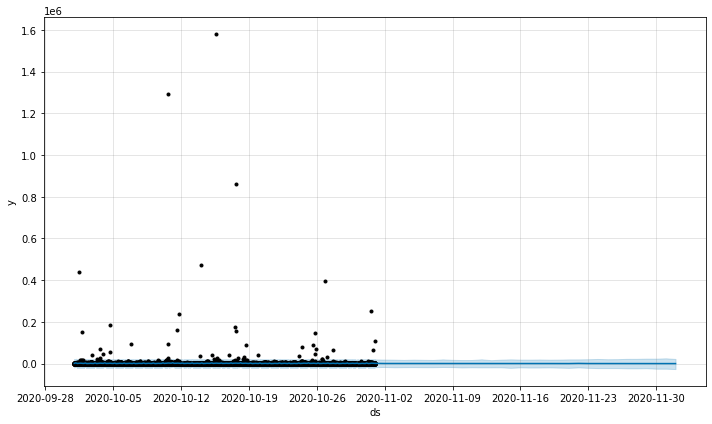

In [56]:
## Graph der predictions
fig1 = prophet_basic.plot(forecast)

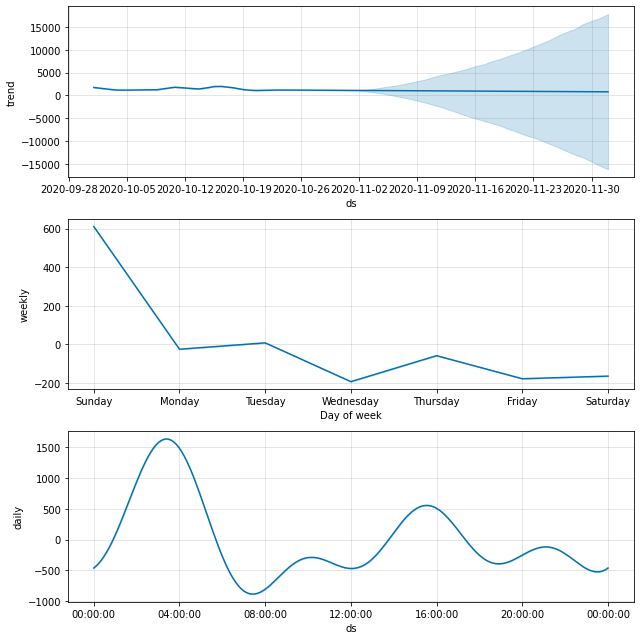

In [57]:
## 4 Komponenten (trend, weekly, yearly, daily) anzeigen
fig2 = prophet_basic.plot_components(forecast)

In [58]:
## Anzeige verschiedener Ergebnisse des forecasts in einer Tabelle
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-10-01 00:02:40.260,1748.558279,-17469.768502,20281.568646,1748.558279,1748.558279,-505.664309,-505.664309,-505.664309,-448.037047,-448.037047,-448.037047,-57.627263,-57.627263,-57.627263,0.0,0.0,0.0,1242.893970
1,2020-10-01 00:02:53.502,1748.527681,-17519.470505,19975.418667,1748.527681,1748.527681,-504.547401,-504.547401,-504.547401,-446.982382,-446.982382,-446.982382,-57.565020,-57.565020,-57.565020,0.0,0.0,0.0,1243.980279
2,2020-10-01 00:04:31.316,1748.301663,-17196.649950,18769.474413,1748.301663,1748.301663,-496.059297,-496.059297,-496.059297,-438.953740,-438.953740,-438.953740,-57.105557,-57.105557,-57.105557,0.0,0.0,0.0,1252.242366
3,2020-10-01 00:05:18.368,1748.192940,-17668.766521,18892.693847,1748.192940,1748.192940,-491.826757,-491.826757,-491.826757,-434.942028,-434.942028,-434.942028,-56.884729,-56.884729,-56.884729,0.0,0.0,0.0,1256.366183
4,2020-10-01 00:09:17.599,1747.640152,-15673.538028,18186.968165,1747.640152,1747.640152,-468.802100,-468.802100,-468.802100,-413.038204,-413.038204,-413.038204,-55.763896,-55.763896,-55.763896,0.0,0.0,0.0,1278.838052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30112,2020-11-27 23:40:06.353,835.924570,-22819.988005,22858.687785,-13000.091517,14579.683511,-692.645384,-692.645384,-692.645384,-516.286761,-516.286761,-516.286761,-176.358623,-176.358623,-176.358623,0.0,0.0,0.0,143.279186
30113,2020-11-28 23:40:06.353,825.811982,-21997.197631,23903.787070,-13635.478139,15687.955355,94.117321,94.117321,94.117321,-516.286761,-516.286761,-516.286761,610.404082,610.404082,610.404082,0.0,0.0,0.0,919.929303
30114,2020-11-29 23:40:06.353,815.699395,-24483.818597,23834.575428,-14488.717501,16364.589540,-533.549638,-533.549638,-533.549638,-516.286761,-516.286761,-516.286761,-17.262877,-17.262877,-17.262877,0.0,0.0,0.0,282.149757
30115,2020-11-30 23:40:06.353,805.586807,-24419.170638,25406.256110,-15438.250291,16980.781352,-511.148893,-511.148893,-511.148893,-516.286761,-516.286761,-516.286761,5.137868,5.137868,5.137868,0.0,0.0,0.0,294.437914
